# Economics Problem Set 1




## Question 1


### 1. State variables:

Stock of oil $S_t$
Price $p_t$

### 2. Control variables:

Amount of oil to sell $x_t$

### 3. Transition equation:

$$S_{t+1} = S_t - x_t$$

### 4. Sequence problem

Max $E_{t}\{\Sigma_{s=1}^{\infty}p_{t+s}x_{t+s}(\frac{1}{1+r})^s) \}$
subject to $S_{t+s+1} = S_{t+s} - x_{t+s}$    $\forall s$ and $S_t = B$ and $S_{t+s} \geqslant 0$

The Bellman equation is of the form:

$$V(S) = Max_x\{px + \frac{1}{1+r} V(S - x)\}$$

### 5. The Euler equation

$$p_{t+s} = p_{t+1+s}(\frac{1}{1+r})$$

### 6. The solution

Since the payoff function is linear, the solution is piecewise.

If $p_{t+1+s} = p_{t+s}$ for all s, then $x_t = B$, i.e. we sell everything today. This is because we get the same absolute payoff from selling a marginal unit in any period, but we discount the future, so we sell everything today.

If $p_{t+1+s} > (1+r)p_{t+s}$ then $x_{t+s} = 0$ for all s. This is actually a violation of the transversality condition, and so the model is not stationary in this case.

A necessary condition for an interior solution is $p_{t+s}(1+r) = p_{t+s+1}$


## Question two

### 1. State variables:

Capital today: $k_t$
Shock today: $z_t$

### 2. Control variables:

Consumption today: $c_t$

### 3. Bellman Equation:

$$V(z_t, k_t) = Max_c\{U(C_{t}) + \beta E_tV(z_{t+1}, k_{t+1})\}$$

subject to the resource contraint:

$$k_{t+1} + c_{t} = z_{t}k_{t}^\alpha + (1-\delta)k_{t}$$



### Import some packages

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

# to print plots inline
%matplotlib inline

### Set Parameters

Parameters:
* $\gamma$ : Coefficient of Relative Risk Aversion
* $\beta$ : Discount factor
* $\delta$ : Rate of depreciation
* $\alpha$ : Curvature of production function
* $\sigma_z$ : Standard dev of productivity shocks


In [2]:
gamma = 0.5
beta = 0.96
delta = 0.05
alpha = 0.4
sigmaz = 0.2
mu = 0
rho = 0

### Create Grid Space

In [32]:
'''
------------------------------------------------------------------------
Create Grid for State Space - Capital and Shock
------------------------------------------------------------------------
lb_k      = scalar, lower bound of capital grid
ub_k      = scalar, upper bound of capital grid
size_k    = integer, number of grid points in capital state space
k_grid    = vector, size_k x 1 vector of capital grid points 
------------------------------------------------------------------------
'''
lb_k = 10
ub_k = 13
size_k = 60  # Number of grid points of k
size_z = 60 # Number of grid points of z
k_grid = np.linspace(lb_k, ub_k, size_k)

import ar1_approx as ar1
ln_z_grid, pi = ar1.addacooper(size_z, mu, rho, sigmaz)
z_grid = np.exp(ln_z_grid)
pi_z = np.transpose(pi)



In [33]:
'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
C        = matrix, current consumption (c=z_tk_t^a - k_t+1 + (1-delta)k_t)
U        = matrix, current period utility value for all possible
           choices of w and w' (rows are w, columns w')
------------------------------------------------------------------------
'''

C = np.zeros((size_k, size_k, size_z))
for i in range(size_k): # loop over k_t
    for j in range(size_k): # loop over k_t+1
        for q in range(size_z): #loop over z_t
            C[i, j, q] = z_grid[q]* k_grid[i]**alpha + (1 - delta)*k_grid[i] - k_grid[j]
# replace 0 and negative consumption with a tiny value 
# This is a way to impose non-negativity on cons
C[C<=0] = 1e-15
if gamma == 1:
    U = np.log(C)
else:
    U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -9999999


### Shock transition matrix 

### Value function iteration

In [34]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of w and w'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of w' for all w 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-6 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros((size_k, size_z)) # initial guess at value function
Vmat = np.zeros((size_k, size_k, size_z)) # initialize Vmat matrix
Vstore = np.zeros((size_k, size_z, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    print('This is the distance', VFdist, VFiter)
    for i in range(size_k): # loop over k_t
        for j in range(size_k): # loop over k_t+1
            for q in range(size_z): #loop over z_t
                EV = 0
                for qq in range(size_z):
                    EV += pi_z[q, qq]*V[j, qq]
                Vmat[i, j, q] = U[i, j, q] + beta * EV
      
    Vstore[:,:, VFiter] = V.reshape(size_k, size_z,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator over k_t+1
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 
    


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

This is the distance 7.0 1
This is the distance 5.2679396139508 2
This is the distance 3.090559199888121 3
This is the distance 2.8002506796346065 4
This is the distance 2.616099018915172 5
This is the distance 2.4819149199332333 6
This is the distance 2.369442806890804 7
This is the distance 2.267673183988652 8
This is the distance 2.172857395717461 9
This is the distance 2.0833540823576087 10
This is the distance 1.9983072808102307 11
This is the distance 1.9172031866428512 12
This is the distance 1.8396868204592671 13
This is the distance 1.7655013414361989 14
This is the distance 1.6944451582581088 15
This is the distance 1.6263428928414 16
This is the distance 1.5610464470134104 17
This is the distance 1.498419486504062 18
This is the distance 1.4383416836174803 19
This is the distance 1.38070064872759 20
This is the distance 1.325389435705162 21
This is the distance 1.2723095460721368 22
This is the distance 1.2213672397096218 23
This is the distance 1.1724735127413197 24
This is

This is the distance 0.0015739042861042662 186
This is the distance 0.0015109481146424741 187
This is the distance 0.0014505101900397221 188
This is the distance 0.0013924897824892923 189
This is the distance 0.0013367901911749414 190
This is the distance 0.0012833185835319227 191
This is the distance 0.0012319858401781403 192
This is the distance 0.0011827064065812465 193
This is the distance 0.0011353981503248178 194
This is the distance 0.0010899822243004564 195
This is the distance 0.0010463829353568599 196
This is the distance 0.0010045276179369012 197
This is the distance 0.0009643465132143092 198
This is the distance 0.000925772652692558 199
This is the distance 0.0008887417465928138 200
This is the distance 0.0008531920767325119 201
This is the distance 0.0008190643936671904 202
This is the distance 0.0007863018179108394 203
This is the distance 0.0007548497451921321 204
This is the distance 0.000724655755391268 205
This is the distance 0.0006956695251858491 206
This is the dis

This is the distance 1.348657477251436e-06 359
This is the distance 1.2947111542871426e-06 360
This is the distance 1.242922735400498e-06 361
This is the distance 1.1932058185948335e-06 362
This is the distance 1.1454775687980145e-06 363
This is the distance 1.099658490488764e-06 364
This is the distance 1.0556721292687143e-06 365
This is the distance 1.013445256603518e-06 366
Value function converged after this many iterations: 367


<Figure size 432x288 with 0 Axes>

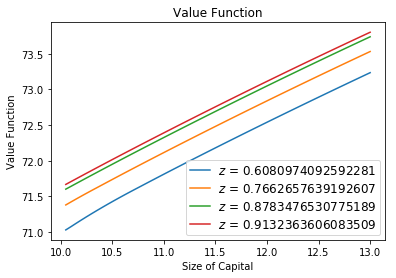

In [38]:
# Plot value function
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(z_grid[0]))
ax.plot(k_grid[1:], VF[1:, 5], label='$z$ = ' + str(z_grid[5]))
ax.plot(k_grid[1:], VF[1:, 15], label='$z$ = ' + str(z_grid[15]))
ax.plot(k_grid[1:], VF[1:, 19], label='$z$ = ' + str(z_grid[19]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function')
plt.show()

<Figure size 432x288 with 0 Axes>

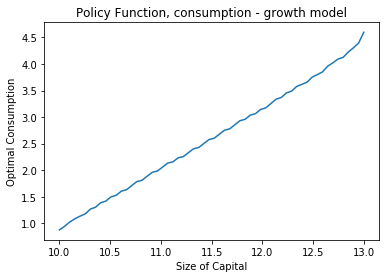

In [39]:
#Plot optimal consumption rule as a function of capital
optK = k_grid[PF]
optC = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - optK
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][18], label='Consumption')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption - growth model')
plt.show()


<Figure size 432x288 with 0 Axes>

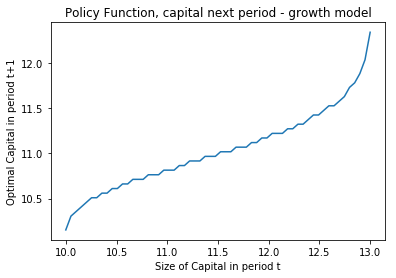

In [41]:
#Plot optimal capital in period t + 1 rule as a function of cake size
optK = k_grid[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][18], label='Capital in period t+1')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital in period t')
plt.ylabel('Optimal Capital in period t+1')
plt.title('Policy Function, capital next period - growth model')
plt.show()

